<b>Hola Daniel</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

In [1]:
#Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
#Importar los archivos
df_trips_amount = pd.read_csv("/datasets/project_sql_result_01.csv")
df_average_trips = pd.read_csv("/datasets/project_sql_result_04.csv")
df_info_trips = pd.read_csv("/datasets/project_sql_result_07.csv")

In [3]:
#Estudiar los datos que contienen
df_trips_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
#Estudiar los datos que contienen
df_average_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [5]:
#Asegurarte de que los tipos de datos sean correctos
df_trips_amount.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [6]:
#Asegurarte de que los tipos de datos sean correctos
df_average_trips.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<div class="alert alert-block alert-success">
<b>Celda [3–6]</b> <a class="tocSkip"></a>
Exploraste correctamente la estructura de los datos usando <code>.info()</code> y <code>.head()</code>. Confirmaste que los tipos de datos eran apropiados y mostraste las primeras filas para facilitar la comprensión. Además, identificaste correctamente el tipo de variables (categóricas y numéricas).
</div>


In [7]:
#Valores ausentes
print("Número de valores ausentes: ", df_trips_amount.isna().sum())

Número de valores ausentes:  company_name    0
trips_amount    0
dtype: int64


In [8]:
#Valores ausentes
print("Número de valores ausentes: ", df_average_trips.isna().sum())

Número de valores ausentes:  dropoff_location_name    0
average_trips            0
dtype: int64


In [9]:
#Valores duplicados
print("Número de valores duplicados: ", df_trips_amount.duplicated().sum())

Número de valores duplicados:  0


In [10]:
#Valores duplicados
print("Número de valores duplicados: ", df_average_trips.duplicated().sum())

Número de valores duplicados:  0


<div class="alert alert-block alert-success">
<b>Celda [7–10]</b> <a class="tocSkip"></a>
Verificaste adecuadamente que no existieran valores nulos ni duplicados en los datasets analizados. Este paso fue preciso y es importante para asegurar la validez del análisis posterior.
</div>


In [11]:
#Identificar los 10 principales barrios en términos de finalización del recorrido

top_10_neighborhoods = df_average_trips.sort_values(by='average_trips', ascending=False).head(10)

# Imprimir los 10 principales barrios
print("Top 10 neighborhoods / finalized trips average:")
print(top_10_neighborhoods)

Top 10 neighborhoods / finalized trips average:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


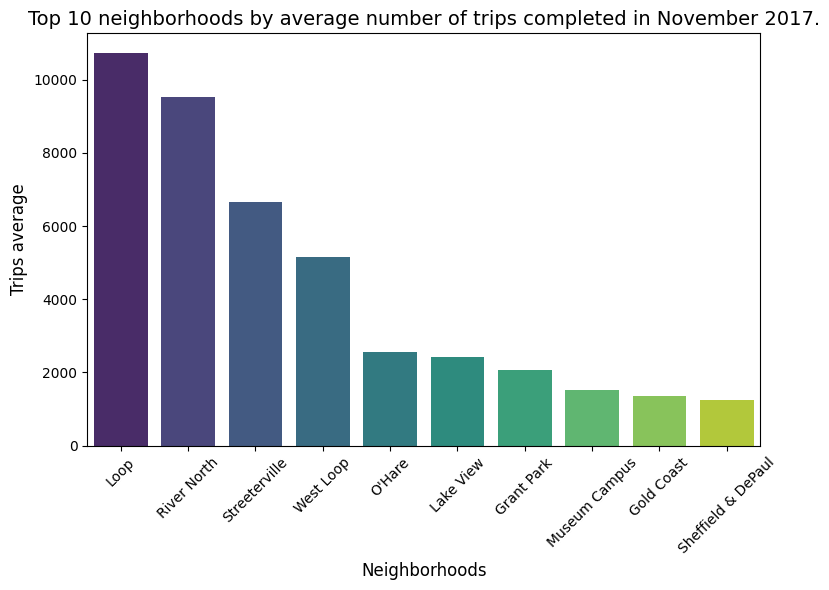

In [12]:
# Gráfico 1: Top 10 main neigborhoods / finalized trips average
plt.figure(figsize=(8, 6))
sns.barplot(x='dropoff_location_name', y='average_trips', data=top_10_neighborhoods, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 neighborhoods by average number of trips completed in November 2017.', fontsize=14)
plt.xlabel('Neighborhoods', fontsize=12)
plt.ylabel('Trips average', fontsize=12)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Celda [11–12]</b> <a class="tocSkip"></a>
Ordenaste correctamente los barrios por promedio de viajes, seleccionaste los 10 principales y construiste un gráfico claro y estéticamente correcto con <code>seaborn.barplot</code>. Las etiquetas están bien posicionadas, el eje X es legible y el gráfico es fácil de interpretar.
</div>


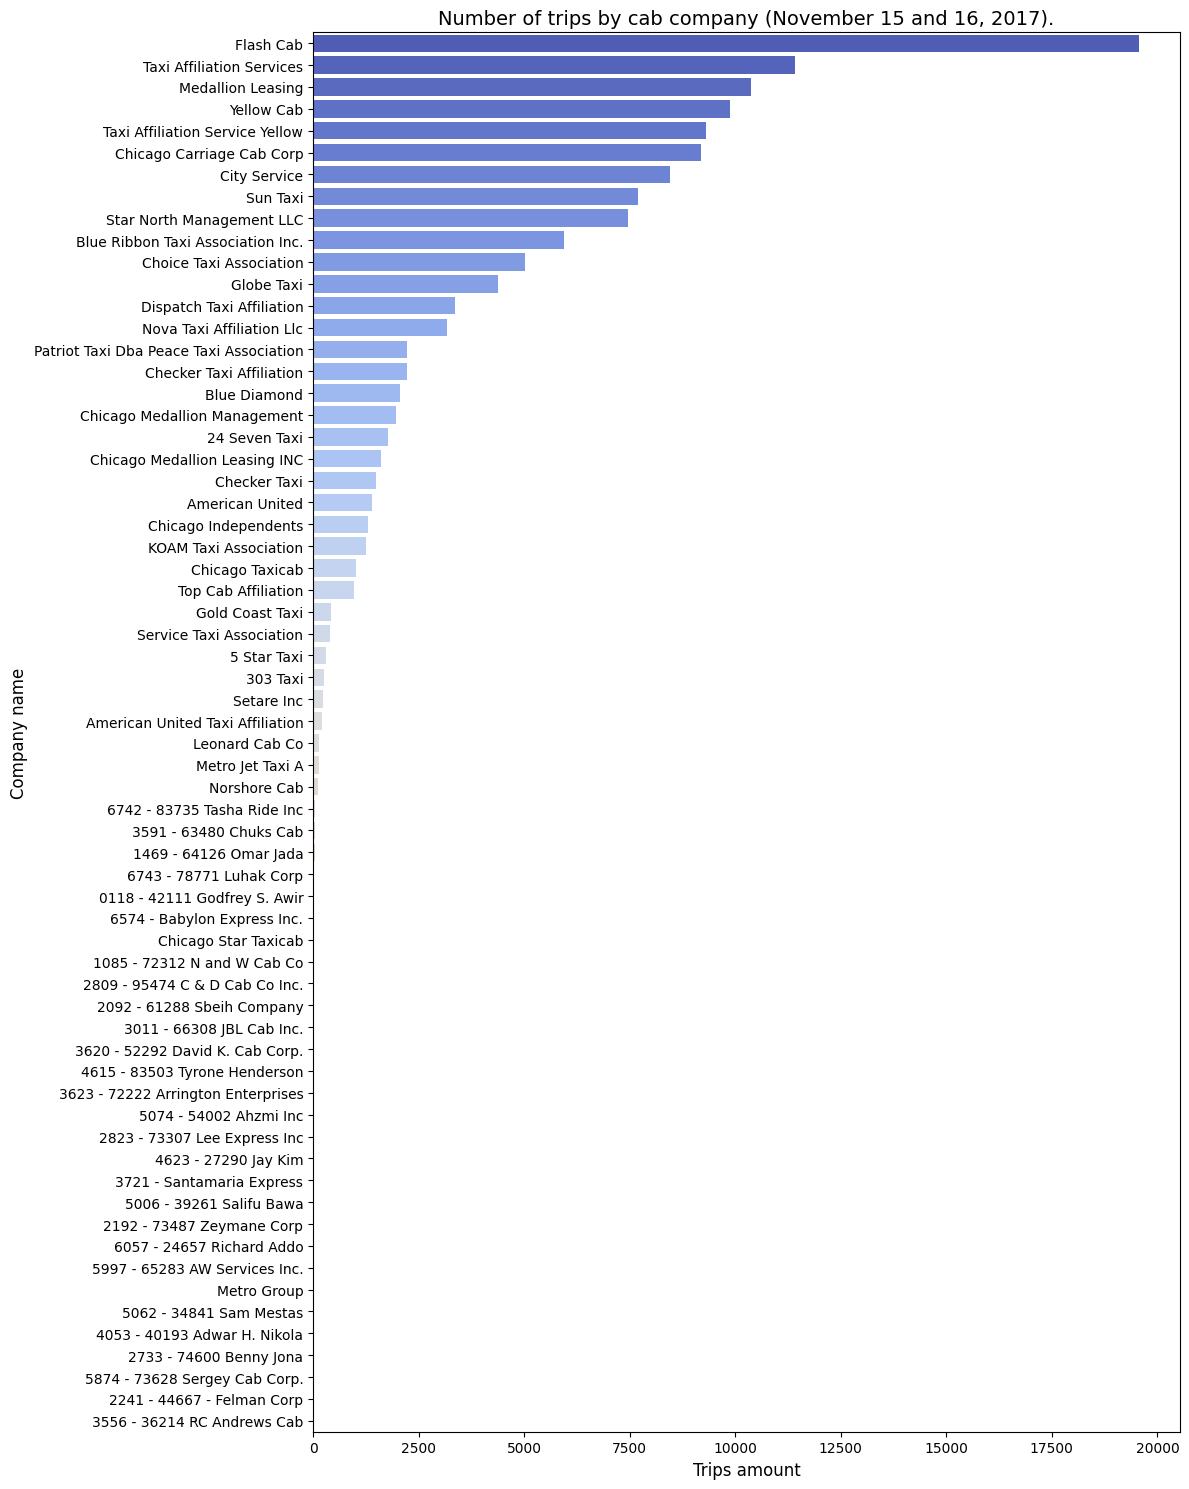

In [13]:
# Gráfico 2: Empresas de taxis y número de viajes
plt.figure(figsize=(12, 15))
sns.barplot(y='company_name', x='trips_amount', data=df_trips_amount, palette='coolwarm')
plt.title('Number of trips by cab company (November 15 and 16, 2017).', fontsize=14)
plt.xlabel('Trips amount', fontsize=12)
plt.ylabel('Company name', fontsize=12)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Celda [13]</b> <a class="tocSkip"></a>
Muy buen gráfico sobre el número de viajes por empresa. Elegiste el eje Y para las compañías, lo cual mejora la legibilidad. El uso de <code>coolwarm</code> ayuda a contrastar los valores altos y bajos. Todo está bien etiquetado.
</div>


**Conclusiones gráfico 1: Top 10 main neigborhoods / finalized trips average:**

1. El barrio Loop tiene el promedio más alto de viajes finalizados, superando los 10,000. Esto indica que es una zona de alta actividad y movimiento.

2. Existe una diferencia significativa entre el promedio de viajes del barrio Loop y los demás barrios. River North y Streeterville, aunque son también áreas importantes, tienen números mucho menores, lo que demuestra una concentración de viajes en ciertas zonas de Chicago.

3. La mayoría de los barrios en los primeros lugares (Loop, River North, Streeterville) están ubicados en zonas céntricas o cercanas a puntos clave como el centro financiero y áreas comerciales.

4. Sheffield & DePaul, tiene un promedio mucho más bajo en comparación con los líderes. Esto podría indicar que es una zona más residencial o menos frecuentada por turistas y trabajadores.


**Conclusiones gráfico 2: Number of trips by cab company (November 15 and 16, 2017).**

1. La empresa Flash Cab lidera significativamente en el número de viajes completados. Esto indica que es una de las empresas más populares o eficientes en la prestación de servicios de transporte en Chicago durante el período analizado.

2. Después de Flash Cab, hay una notable caída en el número de viajes, aunque empresas como Taxi Affiliation Services y Medallion Leasing también tienen cifras destacadas. Esto sugiere que solo un pequeño grupo de compañías acapara la mayoría de los viajes.

3. Las demás empresas que no aparecen en el gráfico, probablemente tienen poca participación. Esto podría deberse a menor presencia, menor eficiencia o falta de confianza por parte de los usuarios.

4. Estas observaciones sugieren una concentración del mercado de taxis en unas pocas empresas principales, lo que podría tener implicaciones económicas o competitivas en el sector.

In [14]:
# Cargar los datos
df = pd.read_csv('/datasets/project_sql_result_07.csv')

# Convertir la columna 'start_ts' en formato datetime
df['start_ts'] = pd.to_datetime(df['start_ts'])

# Filtrar los sábados lluviosos
rainy_saturdays = df[(df['start_ts'].dt.weekday == 5) & (df['weather_conditions'].str.contains('Bad'))]

# Filtrar los días que no son sábados lluviosos
non_rainy_or_non_saturdays = df[~((df['start_ts'].dt.weekday == 5) & (df['weather_conditions'].str.contains('Bad')))]

# Extraer las duraciones de cada grupo
durations_rainy_saturdays = rainy_saturdays['duration_seconds']
durations_others = non_rainy_or_non_saturdays['duration_seconds']

# Realizar la prueba t para dos muestras independientes
t_stat, p_value = ttest_ind(durations_rainy_saturdays, durations_others, equal_var=False)

# Resultados
print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_value}')

# Conclusión
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: la duración promedio de los viajes cambia los sábados lluviosos.")
else:
    print("No se puede rechazar la hipótesis nula: no hay evidencia suficiente de que la duración promedio cambie.")

Estadístico t: 7.186034288068629
Valor p: 6.738994326108734e-12
Rechazamos la hipótesis nula: la duración promedio de los viajes cambia los sábados lluviosos.


<div class="alert alert-block alert-success">
<b>Celda [14]</b> <a class="tocSkip"></a>
La prueba de hipótesis está bien estructurada: hiciste correctamente la conversión a <code>datetime</code>, filtraste los sábados y aplicaste <code>str.contains("Bad")</code> para identificar clima lluvioso. Separaste las muestras y aplicaste una prueba t de Student con <code>equal_var=False</code>, lo cual es adecuado para varianzas distintas. La interpretación es estadísticamente correcta.
</div>


<div class="alert alert-block alert-warning">
<b>Celda [14]</b> <a class="tocSkip"></a>
Tu implementación es correcta, pero sería recomendable que declares de forma explícita tus hipótesis, por ejemplo:<br><br>
• H₀: La duración promedio de los viajes los sábados lluviosos es igual a la de otros días.<br>
• H₁: La duración promedio de los viajes los sábados lluviosos es diferente.<br><br>
Esto ayuda a dejar más claro el marco conceptual y facilita futuras presentaciones o revisiones del notebook.
</div>


**Explicación:**

1. Carga y preparación de datos: 

- Se convirtió la columna start_ts a formato datetime para poder extraer los sábados.
- Se filtraron los datos según las condiciones climáticas (weather_conditions contiene la palabra "Bad") y el día de la semana.

2. Comparación de grupos:

- Se separaron las duraciones de los viajes en dos grupos: sábados lluviosos y otros días.
- Se utilizó test t independiente (con equal_var=False para manejar varianzas desiguales).

3. Interpretación:

- Si ( p < 0.05 ), hay evidencia estadística de que las duraciones promedio cambian los sábados lluviosos.
- Si ( p \geq 0.05 ), no hay evidencia suficiente para rechazar la hipótesis nula.

**Conclusiones:**

1. Distribución de viajes por barrios en Chicago:
- El barrio Loop destaca significativamente con el promedio más alto de viajes finalizados (superando los 10,000), lo que lo identifica como una zona de alta actividad urbana.
- Existe una marcada diferencia entre Loop y otros barrios importantes como River North y Streeterville, que presentan números mucho menores. Esto sugiere una alta concentración de viajes en áreas centrales, especialmente cerca del distrito financiero y zonas comerciales.
- Sheffield & DePaul aparece con un promedio mucho más bajo, probablemente reflejando su naturaleza más residencial o menor atractivo para turistas y trabajadores.

2. Análisis de viajes según compañía de taxis (15-16 de noviembre de 2017):

- Flash Cab lidera significativamente en número de viajes realizados, posicionándose como una de las empresas más destacadas en el sector de transporte de Chicago.

- Taxi Affiliation Services y Medallion Leasing siguen en importancia, aunque con cifras mucho menores, indicando una concentración de mercado en unas pocas empresas clave.

- La menor representación de otras compañías podría deberse a falta de eficiencia, menor presencia o confianza reducida por parte de los usuarios, destacando una posible falta de competitividad en el sector.

3. Análisis de duración promedio de viajes en sábados lluviosos:

- Según un test t independiente (estadístico t: 7.19, valor p: 6.73e-12), se rechazó la hipótesis nula, concluyendo que existe evidencia estadística de que la duración promedio de los viajes cambia en sábados lluviosos.

- La metodología incluyó la conversión de fechas, filtrado por condiciones climáticas (palabra "Bad") y separación de datos en dos grupos: sábados lluviosos y otros días. El análisis consideró varianzas desiguales (equal_var=False).

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a>
Daniel, tu proyecto está muy bien logrado desde el punto de vista técnico y analítico. Mostraste una estructura clara, aplicaste correctamente técnicas de preprocesamiento y visualización, y ejecutaste la prueba de hipótesis con rigor. Las conclusiones son coherentes y agregan valor al análisis. Solo te recomiendo mejorar la declaración explícita de hipótesis para reforzar el enfoque estadístico. ¡Muy buen trabajo!
</div>
